<a href="https://colab.research.google.com/github/Marco7years/ADM-HW1-MarcoSettanni/blob/main/1_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifiers evaluation
In this exercise we do a basic evaluation for classifiers.

This also shows the most important tools for data manipulation and visualization.


## Isolate the problem
Given an input vector of features $\mathbf{x}$, we want to learn a classifier $f: \mathbf{x} \mapsto y$ that predicts the appropriate class label $y \in \{1, \dots, C\}$.

The training set consists of features and classes/lables: $\mathcal{D}_{\text{tr}} = \{(\mathbf{x}_i, y_i)\}$.

## Collect a dataset
For this demonstration we use three standard datasets. These can be loaded from `sklearn.datasets` module.

In [1]:
from sklearn import datasets

# Iris dataset
iris_data = datasets.load_iris()
iris_x = iris_data["data"]
iris_y = iris_data["target"]

# Wine dataset
wine_data = datasets.load_wine()
wine_x = wine_data["data"]
wine_y = wine_data["target"]

# Digits dataset
digits_data = datasets.load_digits()
digits_x = digits_data["data"]
digits_y = digits_data["target"]

## Know your data
It's important to analyze your data to see the shape and content of the dataset. Let's start from:

    print(iris_data)
    print(wine_data)
    print(digits_data)

Then explore the objects. Looking at iris, what is `iris_x`, `iris_y`?

In [2]:
print(type(iris_x))
print(type(iris_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### numpy?

[Numpy](https://numpy.org/doc/stable/user/quickstart.html) is the most important numeric manipulation library for Python. It provides data structures and efficient tools for arrays, matrices, number generators and others.


In [3]:
import numpy as np

# Array creation
a1 = np.array([1, 2, 3])
a2 = np.array([[1, 2, 3.2]])
a3 = np.zeros([3, 2])

In [4]:
# Array inspection
print("a1")
print("Homogeneous type:", a1.dtype)
print("How many dimensions:", a1.ndim)
print("Dimensions sizes:", a1.shape)
print("Just print:\n", a1, sep="")

print("\na2")
print("Homogeneous type:", a2.dtype)
print("How many dimensions:", a2.ndim)
print("Dimensions sizes:", a2.shape)
print("Just print:\n", a2, sep="")

print("\na3")
print("Homogeneous type:", a3.dtype)
print("How many dimensions:", a3.ndim)
print("Dimensions sizes:", a3.shape)
print("Just print:\n", a3, sep="")

a1
Homogeneous type: int64
How many dimensions: 1
Dimensions sizes: (3,)
Just print:
[1 2 3]

a2
Homogeneous type: float64
How many dimensions: 2
Dimensions sizes: (1, 3)
Just print:
[[1.  2.  3.2]]

a3
Homogeneous type: float64
How many dimensions: 2
Dimensions sizes: (3, 2)
Just print:
[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [5]:
# Array extraction
print("Select row", a2[0, :])
print("Select column", a2[:, 0])
print("Select with condition", a2[a2 >= 2.0])

Select row [1.  2.  3.2]
Select column [1.]
Select with condition [2.  3.2]


### Know your data

In [6]:
print("Dataset: iris")
print("Input shape:", iris_x.shape)
print("Output shape:", iris_y.shape)
print("Number of samples:", iris_x.shape[0])
print("Number of features:", iris_x.shape[1])
print("Feature type:", iris_y.dtype)
print("Classes:", iris_data.target_names)

Dataset: iris
Input shape: (150, 4)
Output shape: (150,)
Number of samples: 150
Number of features: 4
Feature type: int64
Classes: ['setosa' 'versicolor' 'virginica']


In [7]:
print("Dataset: wine")
print("Input shape:", wine_x.shape)
print("Output shape:", wine_y.shape)
print("Number of samples:", wine_x.shape[0])
print("Number of features:", wine_x.shape[1])
print("Feature type:", wine_y.dtype)
print("Classes:", wine_data.target_names)

Dataset: wine
Input shape: (178, 13)
Output shape: (178,)
Number of samples: 178
Number of features: 13
Feature type: int64
Classes: ['class_0' 'class_1' 'class_2']


In [8]:
print("Dataset: digits")
print("Input shape:", digits_x.shape)
print("Output shape:", digits_y.shape)
print("Number of samples:", digits_x.shape[0])
print("Number of features:", digits_x.shape[1])
print("Feature type:", digits_y.dtype)
print("Classes:", digits_data.target_names)

Dataset: digits
Input shape: (1797, 64)
Output shape: (1797,)
Number of samples: 1797
Number of features: 64
Feature type: int64
Classes: [0 1 2 3 4 5 6 7 8 9]


Note: the features of digits are *images*!

In [20]:
imgs = [digits_x[i].astype(np.uint8) for i in range(4)]

In [32]:
imgs[0].shape

(64,)

In [23]:
imgs1 = [digits_x[i].reshape([8, -1]).astype(np.uint8) for i in range(4)]

In [34]:
imgs1[0].shape

(8, 8)

Classes: [0, 1, 2, 3]



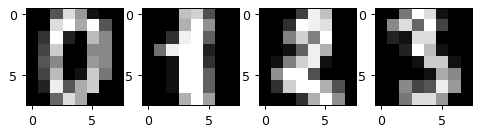

In [9]:
from matplotlib import pyplot as plt

# Reshaping
imgs = [
      digits_x[i].reshape([8, -1]).astype(np.uint8) #     
      for i in range(4)                             # take the first 4 images
]
imgs_classes = [digits_y[i] for i in range(4)]

# Show
print(f"Classes: {imgs_classes}\n")

fig, axes = plt.subplots(1,4, dpi=90)
for ax, img in zip(axes, imgs):
    ax.imshow(img, cmap="gray")
fig.show()

### Choose a dataset
Which dataset do we want to experiment with?

In [ ]:
# Dataset variables
data_x = iris_x
data_y = iris_y

# Just for visualization
feature_names = iris_data.feature_names
class_names = iris_data.target_names

## Prepare training and test sets

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(
    data_x,
    data_y,
    test_size=0.33,
    random_state=234,   # Any seed is fine. This is set for repeatability
)

## Define model and choose algorithm

In sklearn all predictors are called "models", however they also contain the algorithm needed to fit the actual model to the training data. So, they define both a model and the learning algorithm.

We experiment with various classifiers.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


### Choose one model
Choose model an hyperparameters (we rely on defaults).

In [ ]:
model = DecisionTreeClassifier()

## Fit the model

This is where learning happens. The model is modified in order to "best" approximate the training data. Each model and algorithm is different, and "best" has different meanings depending on the model we are using (compare optimility of naive Bayes classifier with decision trees)

In [ ]:
model.fit(train_x, train_y)

DecisionTreeClassifier()

### Get insight on the model

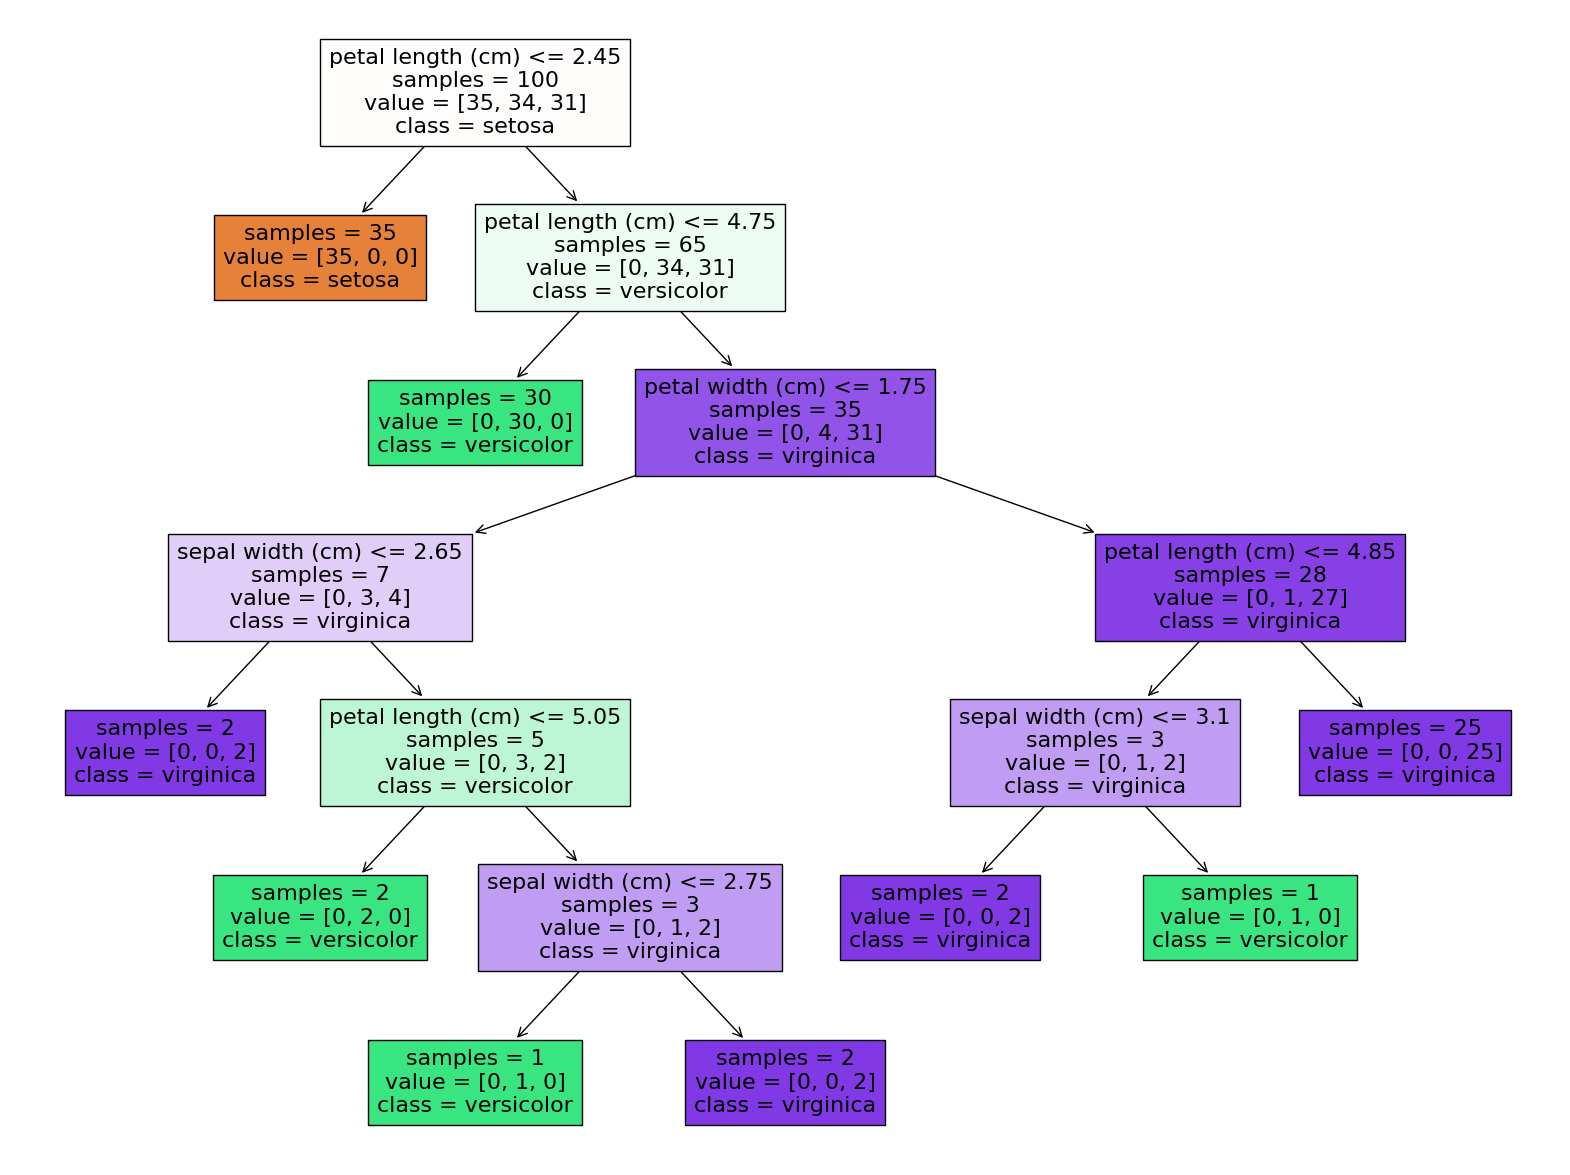

In [ ]:
## Maybe plot

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

if isinstance(model, DecisionTreeClassifier):
    fig, ax = plt.subplots(figsize=(20, 15))
    plot_tree(
        model,
        class_names=class_names,
        feature_names=feature_names,
        filled=True,
        impurity=False,
        node_ids=False,
        ax=ax,
    )
    fig.show()

## Evaluate the model

### Compute test set accuracy

In [ ]:
# Predict on test set
pred_y = model.predict(test_x)  # note test set here

# Compute accuracy
n_correct = (pred_y == test_y).sum()
n_total = len(test_y)
accuracy = n_correct / n_total

print("Test set size:", n_total)
print("Model accuracy on test set:", accuracy)

Test set size: 50
Model accuracy on test set: 0.96


Metrics are also in sklearn

In [ ]:
from sklearn import metrics

print(
    "Model accuracy on test set:",
    metrics.accuracy_score(test_y, pred_y),
)

Model accuracy on test set: 0.96


### Why accuracy alone is not enough
Here we show why accuracy alone is not sufficient to compare models. Suppose the task is to predict whether a digit is a zero.

Let's start by creating a dataset

In [ ]:
# Separate zeros and non-zeros
zeros_in_x = (digits_y == 0)
zeros_x = digits_x[zeros_in_x, :]
nonzeros_x = digits_x[~zeros_in_x, :]

# Take only few zeros
some_zeros_x = zeros_x[:40, :]

# This is the dataset
nz_x = np.concatenate((some_zeros_x, nonzeros_x), axis=0)
nz_y = np.concatenate((
    np.zeros(some_zeros_x.shape[0], dtype=bool),
    np.ones(nonzeros_x.shape[0], dtype=bool),
))


This creates an unbalanced dataset among classes:

In [ ]:
print("# of non-zeros:", nz_y.sum())
print("# of zeros:", (~nz_y).sum())

# of non-zeros: 1619
# of zeros: 40


Train a model and compute accuracy as before

In [ ]:

# Train se
nz_train_x, nz_test_x, nz_train_y, nz_test_y = train_test_split(
    nz_x,
    nz_y,
    test_size=0.33,
    random_state=3261,
)

# Fit 
nz_model = GaussianNB()
nz_model.fit(nz_train_x, nz_train_y)

# Accuracy
nz_pred_y = nz_model.predict(nz_test_x)
print("Accuracy of model:", metrics.accuracy_score(nz_test_y, nz_pred_y))

Accuracy of model: 0.9963503649635036


Now, how this compares againts a useless, but possible, model?

In [ ]:
# Useless model: it always predicts non-zero
def useless_predict(in_x):
    return np.ones(shape=(in_x.shape[0],), dtype=bool)

nz_pred2_y = useless_predict(nz_test_y)
print("Accuracy of useless model:", metrics.accuracy_score(nz_test_y, nz_pred2_y))


Accuracy of useless model: 0.9799270072992701


The accuracy of these two models is very close, considering that the second is not making any meaningful prediction.

### Also evaluate with other metrics

In [ ]:
print(
    metrics.classification_report(
        test_y,
        pred_y,
        target_names=class_names,
    )
)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      0.94      0.94        16
   virginica       0.95      0.95      0.95        19

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



Note, what would be the precision and recall of the useless predictor?

### Confusion matrix
A confusion matrix summarizes the metrics for each class: element $a_{ij}$ is the number (or fraction) of elements of class $i$, that have been classified as $j$.

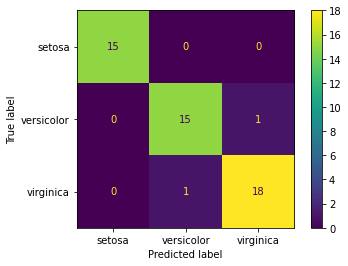

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(
    test_y,
    pred_y,
    display_labels=class_names,
)

## Mistake
Accuracy or other metrics computed on *training set* do not tell how the model will generalize on new data. It can be only used to valuate expressitity of the model and learning algorithm debugging.